# More Line Fitting and Reading from A File with GDP Data

Lets look at some real data and fit a line.  [Life expectencay verus GDP](https://ourworldindata.org/grapher/life-expectancy-vs-gdp-per-capita?xScale=linear) is a common graph.  Let's learn about it.  We are going to
* Read it in as a csv
* Read it in as an excel
* fit a line to the data
* See if we like the fit
* Then for a bonus recreate the plot from the web.


In order to do this we need to start working with Pandas.  I am rearranging a few classes so lets see how it goes.   Pandas is for Panel Data and it is really like reading in and working with excel sheets.  It is going to take us a long time to learn all about it. Unlike Midnights or Tortured Poets Departments Pandas is too big to drop in one day.  So consider this more of a start and don't worry soon you'll get better.  

In [313]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Step 1.
* get GDP_LifeExpectancy2018.xlsx from github
* read it in.
* in pandas you name things df.  df means dataframe.  I sometimes add a second part to the name like dfGDP but other times I just name df. 
* then in the next cell just type df to look at it.  just typing df looks nicer than print(df

In [138]:
df=pd.read_excel('GDP_LifeExpectancy2018.xlsx')

In [139]:
df

,Entity,Country,Code,Year,LifeExpectancy,GDP per capita,Population,Continent
0,Afghanistan,Afghanistan,AFG,2018,63.0810,1934.5550,36686788,Asia
1,Albania,Albania,ALB,2018,79.1838,11104.1660,2877019,Europe
2,Algeria,Algeria,DZA,2018,76.0656,14228.0250,41927008,Africa
3,Angola,Angola,AGO,2018,62.1438,7771.4420,31273538,Africa
4,Argentina,Argentina,ARG,2018,76.9994,18556.3830,44413592,South America
...,...,...,...,...,...,...,...,...
160,Venezuela,Venezuela,VEN,2018,71.9788,10709.9500,29825652,South America
161,Vietnam,Vietnam,VNM,2018,73.9757,6814.1420,94914328,Asia
162,Yemen,Yemen,YEM,2018,64.5751,2284.8900,30790514,Asia
163,Zambia,Zambia,ZMB,2018,62.3422,3534.0337,17835898,Africa


In [314]:
print(df)

         Country Code  Year  LifeExpectancy  GDP per capita  Population  \
0    Afghanistan  AFG  2018         63.0810       1934.5550    36686788   
1        Albania  ALB  2018         79.1838      11104.1660     2877019   
2        Algeria  DZA  2018         76.0656      14228.0250    41927008   
3         Angola  AGO  2018         62.1438       7771.4420    31273538   
4      Argentina  ARG  2018         76.9994      18556.3830    44413592   
..           ...  ...   ...             ...             ...         ...   
160    Venezuela  VEN  2018         71.9788      10709.9500    29825652   
161      Vietnam  VNM  2018         73.9757       6814.1420    94914328   
162        Yemen  YEM  2018         64.5751       2284.8900    30790514   
163       Zambia  ZMB  2018         62.3422       3534.0337    17835898   
164     Zimbabwe  ZWE  2018         61.4141       1611.4052    15052191   

         Continent  PrintName  
0             Asia        NaN  
1           Europe        NaN  
2  

The first pandas trick is df.describe().  This gives you all the basic stats.  Remember how python works that describe is a function working on your df

In [141]:
df.describe()

,Year,LifeExpectancy,GDP per capita,Population
count,165.0,165.000000,165.000000,1.650000e+02
mean,2018.0,72.631356,19053.786587,4.598704e+07
std,0.0,7.792401,20346.341739,1.575906e+08
min,2018.0,52.553600,623.488900,7.084000e+04
25%,2018.0,66.306400,4440.382000,4.270717e+06
50%,2018.0,73.975700,12165.795000,1.063328e+07
75%,2018.0,78.662200,27370.555000,3.239927e+07
max,2018.0,85.245600,153764.170000,1.417069e+09


But today we are just going to touch the surface of pandas and learn about files and then use the data.  
First goal.  
Read Data as CSV
Comma Seperated Value
1. Save excel file as csv.  I used ms-dos csv
1. open with notes or text edit.  What does it look like?
1. now open with python


In [177]:
df=pd.read_csv('GDP_LifeExpectancy2018.csv')

In [178]:
df

,Country,Code,Year,LifeExpectancy,GDP per capita,Population,Continent
0,Afghanistan,AFG,2018,63.0810,1934.5550,36686788,Asia
1,Albania,ALB,2018,79.1838,11104.1660,2877019,Europe
2,Algeria,DZA,2018,76.0656,14228.0250,41927008,Africa
3,Angola,AGO,2018,62.1438,7771.4420,31273538,Africa
4,Argentina,ARG,2018,76.9994,18556.3830,44413592,South America
...,...,...,...,...,...,...,...
160,Venezuela,VEN,2018,71.9788,10709.9500,29825652,South America
161,Vietnam,VNM,2018,73.9757,6814.1420,94914328,Asia
162,Yemen,YEM,2018,64.5751,2284.8900,30790514,Asia
163,Zambia,ZMB,2018,62.3422,3534.0337,17835898,Africa


In [179]:
df.describe()

,Year,LifeExpectancy,GDP per capita,Population
count,165.0,165.000000,165.000000,1.650000e+02
mean,2018.0,72.631356,19053.786587,4.598704e+07
std,0.0,7.792401,20346.341739,1.575906e+08
min,2018.0,52.553600,623.488900,7.084000e+04
25%,2018.0,66.306400,4440.382000,4.270717e+06
50%,2018.0,73.975700,12165.795000,1.063328e+07
75%,2018.0,78.662200,27370.555000,3.239927e+07
max,2018.0,85.245600,153764.170000,1.417069e+09


It is the same thing.  You can use a csv file or an excel file.  For large files csv are more efficient.  But they both work.  But now you know about csv and excel.  lets read in excel.  But also lets add sheet_name so you can read different sheets from an excel file.

In [315]:
df=pd.read_excel('GDP_LifeExpectancy2018.xlsx',sheet_name='Sheet1')

Now to copy the graph we want 

x=GDP

y=life expectancy

We will set them now to make things easier.  In the future we can do it different ways

In [316]:
x=df['GDP per capita']
y=df['LifeExpectancy']

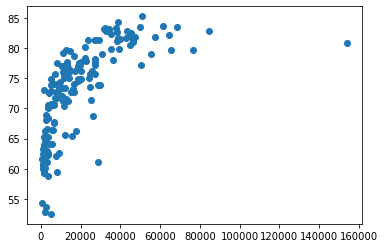

In [317]:
fig,ax=plt.subplots()
ax.scatter(x,y)

You can also put the pandas columns right into scatter

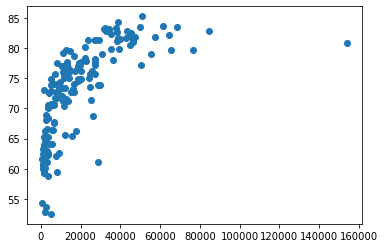

In [318]:
fig,ax=plt.subplots()
ax.scatter(df['GDP per capita'],df['LifeExpectancy'])

To keep things easier and clean for now lets set the x and y and make the plot all in one cell

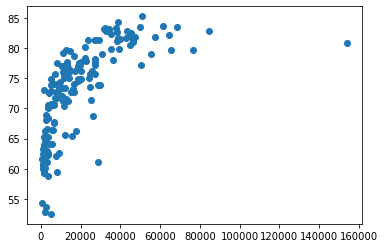

In [319]:
x=df['GDP per capita']
y=df['LifeExpectancy']
fig,ax=plt.subplots()
ax.scatter(x,y)

Then now let's see how a line fits through the data.

In [320]:
stats.linregress(x,y)

LinregressResult(slope=0.0002549989236354205, intercept=67.77266129270281, rvalue=0.6658147349858891, pvalue=1.7223524086250964e-22, stderr=2.2381961326783356e-05)

In [321]:
slope, intercept, r_value,p_value,stderr = stats.linregress(x,y)
textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.3f}\np={:.3f}'\
            .format(slope,intercept\
                    ,r_value**2,p_value)
print(textstr)

m=0.000
b=67.773
$r^2$=0.443
p=0.000


Can you add the line a nice box with the important data?
* On the ax.set_xlabel and ylabel I added the keyword fontsize to make the labels bigger. 

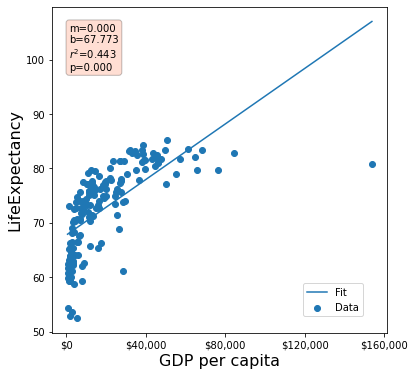

We need to talk x-fit and y-fit.   The point of x-fit is to give a range over which you want to print your line.  You control python and thus control the range of numbers in x_ft.  Some options
1. just use x.  this gives the exact dimensions and I am starting to do this more.
1. Use the min and max of x.  it just gives town numbers so clean that way.  But if you just use x you get the min and max
1. Just give it numbers you like.  The downside is you need to keep resetting them.  remember for this you need to pass np.array([#1, #2])

Go back to your graph and set x_fit to each of these bullets above and see if you get what you expect.  My graph below is setting it to the numbers I wanted.

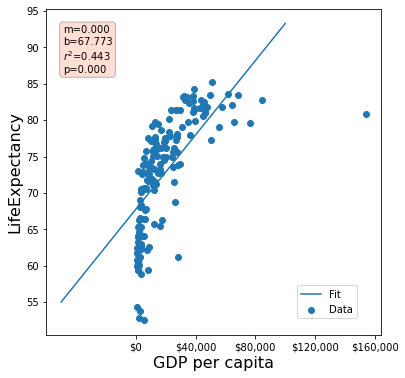

I am not happy with the fit.  The data is curved and our line is straight.  Let's see what happens if we log the data.  Remember in computer log is really ln or natural log and if you want log10 you need log10

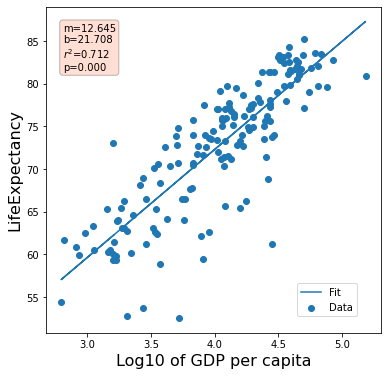

In [206]:
# get the data
x=np.log10(df['GDP per capita'])
y=df['LifeExpectancy']

# plot the data
fig,ax=plt.subplots()
fig.set_size_inches(6,6)
ax.scatter(x,y,label='Data')

ax.set_xlabel('Log10 of GDP per capita',fontsize=16)
ax.set_ylabel('LifeExpectancy',fontsize=16)

#### Do the best fit line and plot it
slope, intercept, r_value,p_value,stderr = stats.linregress(x,y)

x_fit=x
y_fit=x_fit*slope+intercept
ax.plot(x_fit,y_fit,label='Fit')

# Use a comma in the x-axis for dollars
#ax.xaxis.set_major_formatter('${x:,}')

#make a larger step size on x-axis
#ax.xaxis.set_ticks(np.arange(0, 160001, stepsize))

### Add the text box with fit data
props=dict(boxstyle='round',facecolor='coral',alpha=0.25)

textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.3f}\np={:.3f}'\
            .format(slope,intercept\
                    ,r_value**2,p_value)

ax.text(0.05,0.95,textstr,transform=ax.transAxes,fontsize=10\
        ,verticalalignment='top',bbox=props)

#Add the legend
ax.legend(loc=(.75,0.05))

That is a great fit.  Can you try doing 
* Log10 of life Expectancy versus GDP
* Log10 of Life Expectancy versus Log10 of GDP

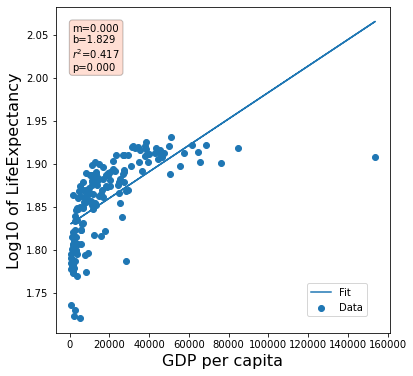

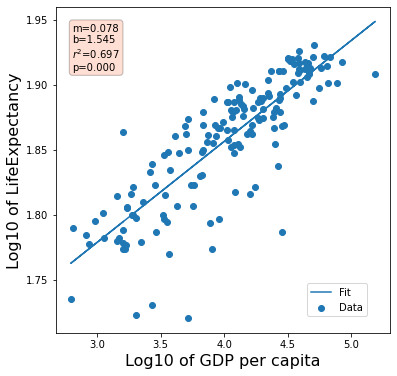

The log10 of GDP per capita does give a nice fit!  

Also if you want log paper you can use 
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.loglog.html

https://matplotlib.org/stable/gallery/scales/log_demo.html



Text(0, 0.5, 'LifeExpectancy')

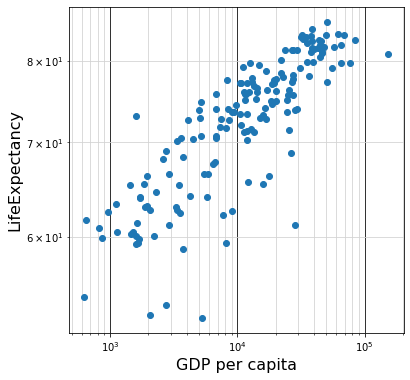

In [220]:
x=df['GDP per capita']
y=df['LifeExpectancy']

fig,ax=plt.subplots()
fig.set_size_inches(6,6)

ax.loglog(x,y,linestyle='none',marker='o',base=10)

#This adds the major and minor grids and makes them slightly different colors
ax.grid(True,which="minor",ls="-", color='lightgrey')
ax.grid(True,which="major",ls="-", color='k')

ax.set_xlabel('GDP per capita',fontsize=16)
ax.set_ylabel('LifeExpectancy',fontsize=16)


To review today you should have read data in to a dataframe df with Pandas and then found a best fit line.  We also looked at the log of the data to find a better fit.  Then we plotted on log paper.  Adding a line on log paper is annoying so we did not do that.  


below I show you two more things.  First I show you how I transformed the data from the website.  Then I try to replicate the graph from the website.

## Extra Part 1

### This is the hardest section.  You can skip this and go look at the graphs.  I would skip extra part 1 and if you have time look at extra part 2 first.  But neither are needed for now.

### How I cleaned the data

If you want to know how I took the data from the website to our class all the data is below. I downloaded the raw data 
https://ourworldindata.org/grapher/life-expectancy-vs-gdp-per-capita?xScale=linear

Firest I read it n and printed the column names

In [147]:
df=pd.read_csv('life-expectancy-vs-gdp-per-capita.csv')

In [148]:
df.columns

Index(['Entity', 'Code', 'Year',
       'Period life expectancy at birth - Sex: all - Age: 0', 'GDP per capita',
       '417485-annotations', 'Population (historical estimates)', 'Continent'],
      dtype='object')

Renamed columns to sometime easier

In [149]:
df.rename(columns={'Entity': 'Country'
                    ,'Period life expectancy at birth - Sex: all - Age: 0': 'LifeExpectancy'
                   ,'Population (historical estimates)':'Population'
                   }
                   ,inplace=True)

In [150]:
df.columns

Index(['Country', 'Code', 'Year', 'LifeExpectancy', 'GDP per capita',
       '417485-annotations', 'Population', 'Continent'],
      dtype='object')

I took years 2018 and 2015.  2015 has the continent and 2018 is the last year with all the data

In [151]:
df=df[(df.Year==2018)|(df.Year==2015)]

I group the two lines into one

In [165]:
agg_f={'Code':'last'
       , 'Year':'last'
       ,'LifeExpectancy':'last'
       , 'GDP per capita':'last'
       ,'417485-annotations':'last'
       ,'Population':'last'
       , 'Continent':'first'
}
dfG=df.groupby(['Country']).agg(agg_f)


I drop missing data

In [166]:
dfG.dropna(subset=['LifeExpectancy'
                   ,'GDP per capita'
                  ,'Continent'],inplace=True)

Get rid of the weird column and save to excel

In [167]:
dfG.drop('417485-annotations',axis=1,inplace=True)

In [168]:
dfG.to_excel('GDP_LifeExpectancy2018_original.xlsx')

## Extra Part 2
### Make the same graph as online
### You can do a lot of this!

In [252]:
df=pd.read_excel('GDP_LifeExpectancy2018.xlsx')

In [234]:
df.columns

Index(['Country', 'Code', 'Year', 'LifeExpectancy', 'GDP per capita',
       'Population', 'Continent', 'PrintName'],
      dtype='object')

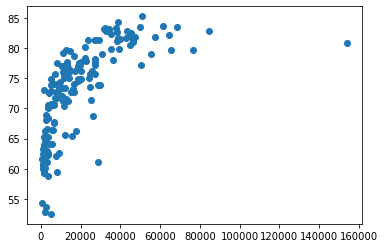

In [238]:
fig,ax=plt.subplots()
ax.scatter(df['GDP per capita'],df['LifeExpectancy'])

I scale the size of the scatter points by population. 

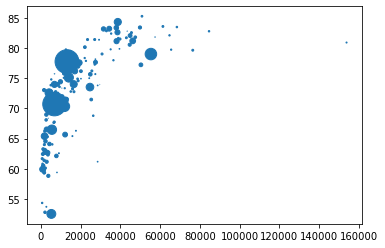

In [239]:
fig,ax=plt.subplots()
size_scale=4e-7
ax.scatter(df['GDP per capita'],df['LifeExpectancy']
           ,s=df['Population']*size_scale)

I make the scatter points transparent with alpha=0.5

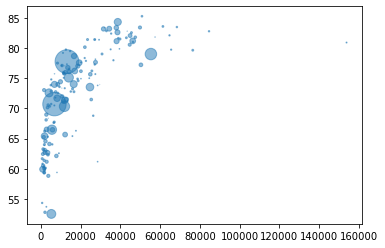

In [240]:
fig,ax=plt.subplots()
size_scale=4e-7
ax.scatter(df['GDP per capita'],df['LifeExpectancy']
           ,s=df['Population']*size_scale
          ,alpha=0.5)

I wanted to add dollar signs and commas to make the dollars look better

Add dollar signs
https://matplotlib.org/stable/gallery/ticks/dollar_ticks.html

I made the labels a little bigger

Text(0, 0.5, 'Life Expectancy at Birth in 2018')

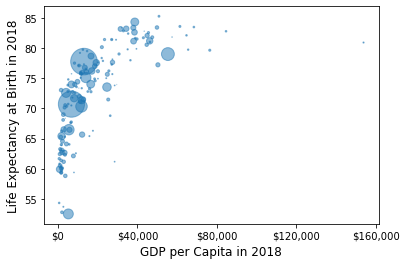

In [325]:
fig,ax=plt.subplots()
size_scale=5e-7
ax.scatter(df['GDP per capita'],df['LifeExpectancy']
           ,s=df['Population']*size_scale
          ,alpha=0.5)
ax.xaxis.set_major_formatter('${x:,}')

stepsize=40000
ax.xaxis.set_ticks(np.arange(0, 160001, stepsize))

ax.set_xlabel('GDP per Capita in 2018',fontsize=12)
ax.set_ylabel('Life Expectancy at Birth in 2018',fontsize=12)



Now we are going to go in the weeds of Python.  This is all extra but fun

Add a legend showing size of dots

https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html

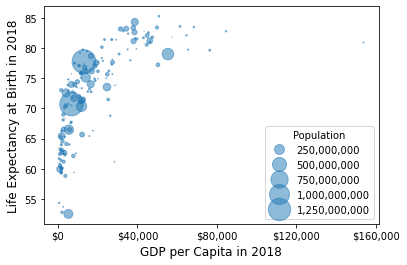

In [327]:
fig,ax=plt.subplots()
size_scale=4e-7
scatter=ax.scatter(df['GDP per capita'],df['LifeExpectancy']
           ,s=df['Population']*size_scale
          ,alpha=0.5)
ax.xaxis.set_major_formatter('${x:,}')
#ax.xaxis.set_ticks([0,40000,80000,120000,160000])

stepsize=40000
ax.xaxis.set_ticks(np.arange(0, 160001, stepsize))

ax.set_xlabel('GDP per Capita in 2018',fontsize=12)
ax.set_ylabel('Life Expectancy at Birth in 2018',fontsize=12)

# Comments from the matplotlib website
# Produce a legend for the price (sizes). Because we want to show the prices
# in dollars, we use the *func* argument to supply the inverse of the function
# used to calculate the sizes from above. The *fmt* ensures to show the price
# in dollars. Note how we target at 5 elements here, but obtain only 4 in the
# created legend due to the automatic round prices that are chosen for us.
kw = dict(prop="sizes", num=6, color='C0', fmt="{x:,.0f}",
          func=lambda s: s/size_scale)
legend2 = ax.legend(*scatter.legend_elements(**kw),
                    loc="lower right", title="Population")

This next one is a great new find to send category numbers to scatter to color code the scatter points.   Then it is a bit crazy to add the legend.  Took me a while to figure out.

easy way to color countries
https://stackoverflow.com/questions/56394204/pandas-groupby-scatter-plot-in-a-single-plot


https://stackoverflow.com/questions/50239331/matplotlib-scatter-legend-with-colors-using-categorical-variable
c = pd.Categorical(df.Country).codes

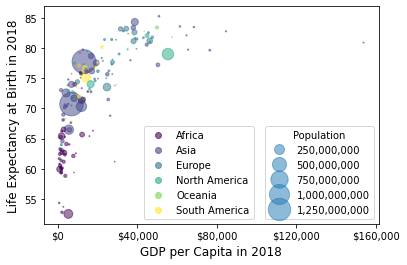

In [330]:
fig,ax=plt.subplots()
size_scale=4e-7

scatter=ax.scatter(df['GDP per capita'],df['LifeExpectancy']
                      ,s=df['Population']*size_scale
                   ,alpha=.5,c=pd.Categorical(df.Continent).codes)

##### This sets the legend colors
handles, _ = scatter.legend_elements(prop="colors", alpha=0.6) # use my own labels
legend1 = ax.legend(handles, pd.Categorical(df.Continent).categories.values
                    , loc=[0.3,0.02])
ax.add_artist(legend1)

##. adds the dollar signs
ax.xaxis.set_major_formatter('${x:,}')

stepsize=40000
ax.xaxis.set_ticks(np.arange(0, 160001, stepsize))

ax.set_xlabel('GDP per Capita in 2018',fontsize=12)
ax.set_ylabel('Life Expectancy at Birth in 2018',fontsize=12)


# Produce a legend for the price (sizes). Because we want to show the prices
# in dollars, we use the *func* argument to supply the inverse of the function
# used to calculate the sizes from above. The *fmt* ensures to show the price
# in dollars. Note how we target at 5 elements here, but obtain only 4 in the
# created legend due to the automatic round prices that are chosen for us.
kw = dict(prop="sizes", num=6, color='C0', fmt="{x:,.0f}",
          func=lambda s: s/size_scale)
legend2 = ax.legend(*scatter.legend_elements(**kw),
                    loc="lower right", title="Population")



The last bit to make it look like the website.  I added a column with PrintName.  If set to True I print it.  So you iterrow or go through row by row and when true print it.

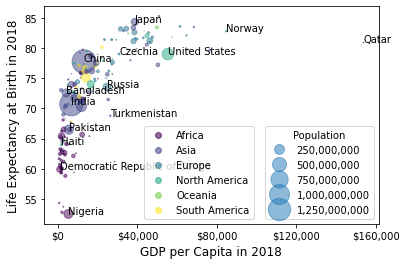

In [331]:
fig,ax=plt.subplots()
size_scale=4e-7

scatter=ax.scatter(df['GDP per capita'],df['LifeExpectancy']
                      ,s=df['Population']*size_scale
                   ,alpha=.5,c=pd.Categorical(df.Continent).codes)

##### color legend
handles, _ = scatter.legend_elements(prop="colors", alpha=0.6) # use my own labels
legend1 = ax.legend(handles, pd.Categorical(df.Continent).categories.values
                    , loc=[0.3,0.02])
ax.add_artist(legend1)

#dollar signs
ax.xaxis.set_major_formatter('${x:,}')

stepsize=40000
ax.xaxis.set_ticks(np.arange(0, 160001, stepsize))


ax.set_xlabel('GDP per Capita in 2018',fontsize=12)
ax.set_ylabel('Life Expectancy at Birth in 2018',fontsize=12)


# Produce a legend for the price (sizes). Because we want to show the prices
# in dollars, we use the *func* argument to supply the inverse of the function
# used to calculate the sizes from above. The *fmt* ensures to show the price
# in dollars. Note how we target at 5 elements here, but obtain only 4 in the
# created legend due to the automatic round prices that are chosen for us.
kw = dict(prop="sizes", num=6, color='C0', fmt="{x:,.0f}",
          func=lambda s: s/size_scale)
legend2 = ax.legend(*scatter.legend_elements(**kw),
                    loc="lower right", title="Population")


#########
for ridx,row in df.iterrows():
    if row['PrintName']==True:
        #print(row['Country']) #In case you need to print the country names
        ax.text(row['GDP per capita']
                ,row['LifeExpectancy']
               ,row['Country'],horizontalalignment='left')

Extra Extra


This adds the colorcoding by groupby

This is how I normally would do it before I found the category codes method this week.

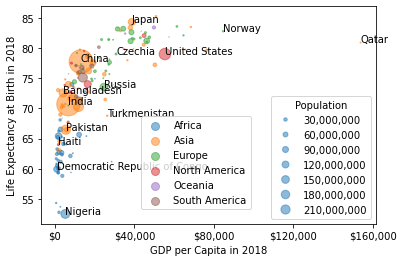

In [332]:
fig,ax=plt.subplots()
size_scale=4e-7

#dfG['PrintName']=['PrintName']

for idx,dfTemp in df.groupby(['Continent']):
    scatter=ax.scatter(dfTemp['GDP per capita'],dfTemp['LifeExpectancy']
           ,s=dfTemp['Population']*size_scale
          ,alpha=0.5,label=idx)
    
    for ridx,row in dfTemp.iterrows():
        if row['PrintName']==True:
            ax.text(row['GDP per capita']
                    ,row['LifeExpectancy']
                   ,row['Country'],horizontalalignment='left')
            
ax.xaxis.set_major_formatter('${x:,}')
#ax.xaxis.set_ticks([0,40000,80000,120000,160000])

stepsize=40000
ax.xaxis.set_ticks(np.arange(0, 160001, stepsize))

ax.set_xlabel('GDP per Capita in 2018')
ax.set_ylabel('Life Expectancy at Birth in 2018')

#https://github.com/matplotlib/matplotlib/issues/12417
legend=fig.legend(loc=(0.35,.2))
for legobj in legend.legendHandles:
    legobj.set_sizes([64])

# Produce a legend for the price (sizes). Because we want to show the prices
# in dollars, we use the *func* argument to supply the inverse of the function
# used to calculate the sizes from above. The *fmt* ensures to show the price
# in dollars. Note how we target at 5 elements here, but obtain only 4 in the
# created legend due to the automatic round prices that are chosen for us.
kw = dict(prop="sizes", num=6, color='C0', fmt="{x:,.0f}",
          func=lambda s: s/size_scale)
legend2 = ax.legend(*scatter.legend_elements(**kw),
                    loc="lower right", title="Population")


# Answers

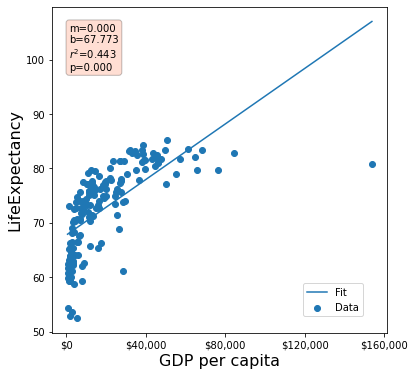

In [198]:
# get the data
x=df['GDP per capita']
y=df['LifeExpectancy']

# plot the data
fig,ax=plt.subplots()
fig.set_size_inches(6,6)
ax.scatter(x,y,label='Data')

ax.set_xlabel('GDP per capita',fontsize=16)
ax.set_ylabel('LifeExpectancy',fontsize=16)

#### Do the best fit line and plot it
slope, intercept, r_value,p_value,stderr = stats.linregress(x,y)

x_fit=np.linspace(min(x),max(x))
y_fit=x_fit*slope+intercept
ax.plot(x_fit,y_fit,label='Fit')

# Use a comma in the x-axis for dollars
ax.xaxis.set_major_formatter('${x:,}')

#make a larger step size on x-axis
stepsize=40000
ax.xaxis.set_ticks(np.arange(0, 160001, stepsize))

### Add the text box with fit data
props=dict(boxstyle='round',facecolor='coral',alpha=0.25)

textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.3f}\np={:.3f}'\
            .format(slope,intercept\
                    ,r_value**2,p_value)

ax.text(0.05,0.95,textstr,transform=ax.transAxes,fontsize=10\
        ,verticalalignment='top',bbox=props)

#Add the legend
ax.legend(loc=(.75,0.05))

### Choosing my own x-fit

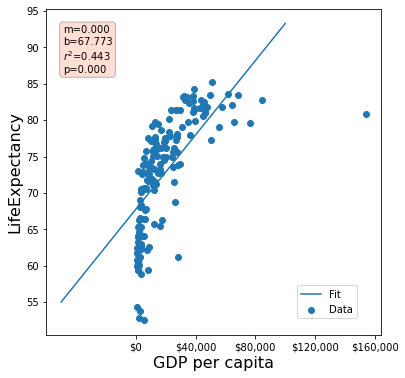

In [226]:
# get the data
x=df['GDP per capita']
y=df['LifeExpectancy']

# plot the data
fig,ax=plt.subplots()
fig.set_size_inches(6,6)
ax.scatter(x,y,label='Data')

ax.set_xlabel('GDP per capita',fontsize=16)
ax.set_ylabel('LifeExpectancy',fontsize=16)

#### Do the best fit line and plot it
slope, intercept, r_value,p_value,stderr = stats.linregress(x,y)

x_fit=np.array([-50000,100000])
y_fit=x_fit*slope+intercept
ax.plot(x_fit,y_fit,label='Fit')

# Use a comma in the x-axis for dollars
ax.xaxis.set_major_formatter('${x:,}')

#make a larger step size on x-axis
stepsize=40000
ax.xaxis.set_ticks(np.arange(0, 160001, stepsize))

### Add the text box with fit data
props=dict(boxstyle='round',facecolor='coral',alpha=0.25)

textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.3f}\np={:.3f}'\
            .format(slope,intercept\
                    ,r_value**2,p_value)

ax.text(0.05,0.95,textstr,transform=ax.transAxes,fontsize=10\
        ,verticalalignment='top',bbox=props)

#Add the legend
ax.legend(loc=(.75,0.05))

## Adding log10

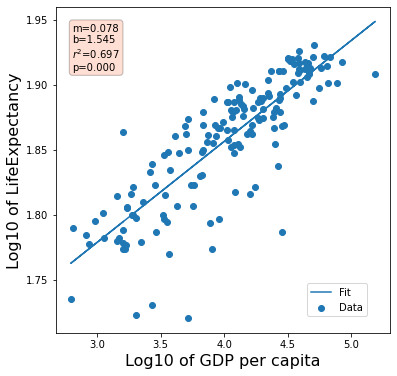

In [227]:
# get the data
x=np.log10(df['GDP per capita'])
y=np.log10(df['LifeExpectancy'])

# plot the data
fig,ax=plt.subplots()
fig.set_size_inches(6,6)
ax.scatter(x,y,label='Data')

ax.set_xlabel('Log10 of GDP per capita',fontsize=16)
ax.set_ylabel('Log10 of LifeExpectancy',fontsize=16)

#### Do the best fit line and plot it
slope, intercept, r_value,p_value,stderr = stats.linregress(x,y)

x_fit=x
y_fit=x_fit*slope+intercept
ax.plot(x_fit,y_fit,label='Fit')

# Use a comma in the x-axis for dollars
#ax.xaxis.set_major_formatter('${x:,}')

#make a larger step size on x-axis
#ax.xaxis.set_ticks(np.arange(0, 160001, stepsize))

### Add the text box with fit data
props=dict(boxstyle='round',facecolor='coral',alpha=0.25)

textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.3f}\np={:.3f}'\
            .format(slope,intercept\
                    ,r_value**2,p_value)

ax.text(0.05,0.95,textstr,transform=ax.transAxes,fontsize=10\
        ,verticalalignment='top',bbox=props)

#Add the legend
ax.legend(loc=(.75,0.05))